In [2]:
import pandas as pd

df = pd.read_csv('sig_EDA_C1_df.csv')
df

,timestamp_s,ts,1,3,4,5,6,7,9,10,...,50,51,52,53,54,55,56,57,58,60
0,0.000,0.000,1.908898,0.560433,2.916876,1.088578,4.913992,0.443389,1.908487,0.118107,...,0.94038,0.640736,0.386494,0.076857,0.674033,1.058090,0.494682,0.905475,0.519018,0.220504
1,0.033,0.033,1.908898,0.560775,2.916534,1.088404,4.913993,0.443132,1.908488,0.118107,...,0.94038,0.640735,0.386319,0.076857,0.674029,1.057920,0.494682,0.905315,0.518980,0.220247
2,0.067,0.067,1.908898,0.561116,2.916192,1.088234,4.913993,0.442962,1.908488,0.118107,...,0.94038,0.640735,0.386151,0.076857,0.674035,1.057749,0.494720,0.905140,0.518600,0.220077
3,0.100,0.100,1.908898,0.561325,2.915851,1.088060,4.913992,0.442791,1.908487,0.118107,...,0.94038,0.640735,0.385973,0.076857,0.673690,1.057578,0.495100,0.904972,0.518145,0.219906
4,0.133,0.133,1.908898,0.561916,2.915699,1.087924,4.913992,0.442620,1.908488,0.118107,...,0.94038,0.640735,0.385842,0.076856,0.672666,1.057407,0.495556,0.904794,0.517828,0.219735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,65.833,65.833,1.602066,0.520437,3.402349,0.985068,4.913992,0.354494,1.900162,0.088647,...,0.94038,0.640736,0.299478,0.077284,0.553773,0.839557,1.195436,0.822226,0.446607,0.884795
1976,65.867,65.867,1.606858,0.520470,3.403557,0.984385,4.913992,0.354319,1.900162,0.088647,...,0.94038,0.640736,0.299819,0.077626,0.555735,0.839054,1.195436,0.821884,0.446265,0.884795
1977,65.900,65.900,1.610177,0.520982,3.403883,0.984061,4.913992,0.354151,1.900162,0.088647,...,0.94038,0.640736,0.299933,0.077967,0.558004,0.838519,1.195436,0.821543,0.445924,0.884795
1978,65.933,65.933,1.613848,0.521324,3.403882,0.983829,4.913993,0.353973,1.900162,0.088647,...,0.94038,0.640735,0.299575,0.078100,0.559588,0.838127,1.195436,0.821429,0.445582,0.884794


In [3]:
## MEAN, STANDARD DEVIATION and VARIANCE
df_eda = df[df.columns.drop(['timestamp_s', 'ts'])]
#df_eda

df_eda_mean = df_eda.mean(axis=0).to_frame().reset_index()
df_eda_mean.columns = ['uID', 'Mean']
df_eda_mean['uID'] = df_eda_mean['uID'].astype(int)
#df_eda_mean

df_eda_std = df_eda.std(axis=0).to_frame().reset_index()
df_eda_std.columns = ['uID', 'Standard Deviation']
df_eda_std['uID'] = df_eda_std['uID'].astype(int)
#df_eda_std

df_eda_var = df_eda.var(axis=0).to_frame().reset_index()
df_eda_var.columns = ['uID', 'Variance']
df_eda_var['uID'] = df_eda_var['uID'].astype(int)
#df_eda_var

In [4]:
## NASA-TLX

df_ans = pd.read_excel('MMAE_NasaTLX_anonim_Q1_5.xlsx')
df_ans['uID'] = df_ans['uID'].astype(int)
#df_ans

In [5]:
## MERGING DATA FRAMES

merged_df = pd.merge(df_eda_var, df_ans, on='uID')
merged_df = pd.merge(df_eda_std, merged_df, on='uID')
merged_df = pd.merge(df_eda_mean, merged_df, on='uID')
#merged_df

In [6]:
## FILTERING DATA

filtered_df = merged_df.drop_duplicates(subset=['uID'], ignore_index=True)
#filtered_df

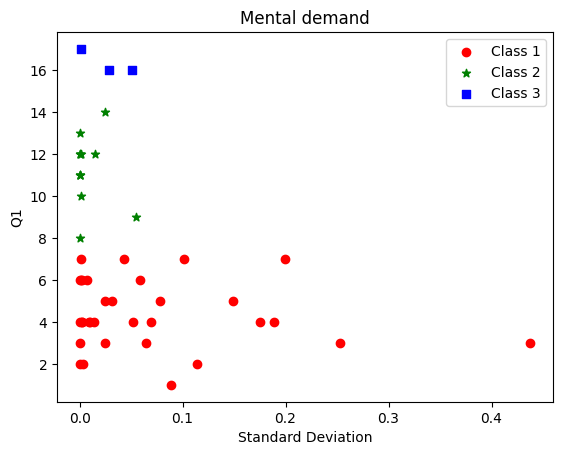

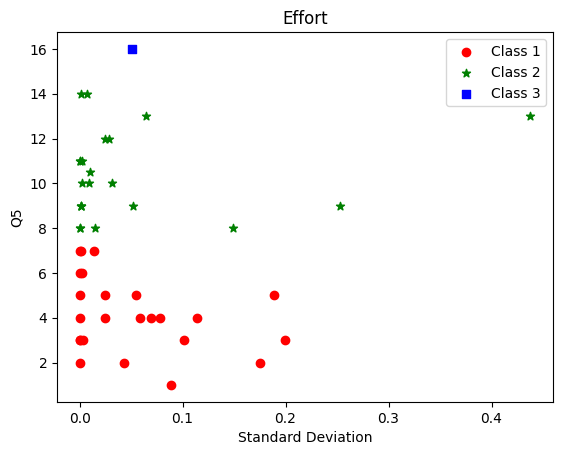

In [7]:
## DEFINING CLASSES
import numpy as np
import matplotlib.pyplot as plt

## Define Q1 classes
q1 = filtered_df['Q1'].to_numpy()
q1_class = []

for q in q1:
    if q < 8:
        q_class = 1
    elif q > 7 and q < 15:
        q_class = 2
    else:
        q_class = 3

    q1_class.append(q_class)

df_q1_class = pd.DataFrame(q1_class)
df_q1_class.columns = ['Q1 Class']

classed_df = pd.DataFrame.join(filtered_df, df_q1_class)

## Define Q5 classes
q5 = filtered_df['Q5'].to_numpy()
q5_class = []

for q in q5:
    if q < 8:
        q_class = 1
    elif q > 7 and q < 15:
        q_class = 2
    else:
        q_class = 3

    q5_class.append(q_class)

df_q5_class = pd.DataFrame(q5_class)
df_q5_class.columns = ['Q5 Class']

classed_df = pd.DataFrame.join(classed_df, df_q5_class)

plt.scatter(classed_df["Standard Deviation"][classed_df["Q1 Class"] == 1], classed_df["Q1"][classed_df["Q1 Class"] == 1],
            color='red', marker='o', label='Class 1')
plt.scatter(classed_df["Standard Deviation"][classed_df["Q1 Class"] == 2], classed_df["Q1"][classed_df["Q1 Class"] == 2],
            color='green', marker='*', label='Class 2')
plt.scatter(classed_df["Standard Deviation"][classed_df["Q1 Class"] == 3], classed_df["Q1"][classed_df["Q1 Class"] == 3],
            color='blue', marker='s', label='Class 3')
plt.xlabel('Standard Deviation')
plt.ylabel('Q1')
plt.legend(loc='best')
plt.title('Mental demand')
plt.show()

plt.scatter(classed_df["Standard Deviation"][classed_df["Q5 Class"] == 1], classed_df["Q5"][classed_df["Q5 Class"] == 1],
            color='red', marker='o', label='Class 1')
plt.scatter(classed_df["Standard Deviation"][classed_df["Q5 Class"] == 2], classed_df["Q5"][classed_df["Q5 Class"] == 2],
            color='green', marker='*', label='Class 2')
plt.scatter(classed_df["Standard Deviation"][classed_df["Q5 Class"] == 3], classed_df["Q5"][classed_df["Q5 Class"] == 3],
            color='blue', marker='s', label='Class 3')
plt.xlabel('Standard Deviation')
plt.ylabel('Q5')
plt.legend(loc='best')
plt.title('Effort')
plt.show()

In [8]:
## PREPROCESSING AND CHOOSING DATASET AND FUNCTION
# Uncomment for choosing dataset Q1 or Q5 and uncomment for choosing a function (Mean, Standard deviation or Variance)

# DATASET Q1
"""
i1 = classed_df['Q1 Class'].value_counts()[1]
i2 = classed_df['Q1 Class'].value_counts()[2]
i3 = classed_df['Q1 Class'].value_counts()[3]

if i1 < 2:
    final_df = classed_df.drop(classed_df[classed_df['Q1 Class'] == 1].index).reset_index()

elif i2 < 2:
    final_df = classed_df.drop(classed_df[classed_df['Q1 Class'] == 2].index).reset_index()

elif i3 < 2:
    final_df = classed_df.drop(classed_df[classed_df['Q1 Class'] == 3].index).reset_index()

else:
    final_df = classed_df

print('Final DataFrame:')
display(final_df)

## Y
y = np.array(final_df['Q1 Class']) # Q1

print('Y set: ', y)
"""
# DATASET Q5

i1 = classed_df['Q5 Class'].value_counts()[1]
i2 = classed_df['Q5 Class'].value_counts()[2]
i3 = classed_df['Q5 Class'].value_counts()[3]


if i1 < 2:
    final_df = classed_df.drop(classed_df[classed_df['Q5 Class'] == 1].index).reset_index()

elif i2 < 2:
    final_df = classed_df.drop(classed_df[classed_df['Q5 Class'] == 2].index).reset_index()

elif i3 < 2:
    final_df = classed_df.drop(classed_df[classed_df['Q5 Class'] == 3].index).reset_index()

else:
    final_df = classed_df

print('Final DataFrame:')
display(final_df)

## Y
y = np.array(final_df['Q5 Class']) # Q5

print('Y set: ', y)


# FUNCTION
# Uncomment for choosing a function (Mean, Standard deviation or Variance)

#x = np.array(final_df['Mean']) # Mean
#x = np.array(final_df['Standard Deviation']) # Standard Deviation
x = np.array(final_df['Variance']) # Variance

print('X set: ', x)


Final DataFrame:


,index,uID,Mean,Standard Deviation,Variance,Q1,Q5,Q1 Class,Q5 Class
0,0,1,1.784332,1.144965e-01,1.310945e-02,2,4.0,1,1
1,1,3,0.534953,1.051975e-02,1.106651e-04,4,10.5,1,2
2,2,4,3.086259,1.489472e-01,2.218527e-02,5,8.0,1,2
3,3,5,1.047460,5.446894e-02,2.966866e-03,9,5.0,2,1
4,4,6,4.913993,1.395292e-15,1.946840e-30,11,6.0,2,1
5,5,7,0.395599,2.461504e-02,6.059002e-04,14,12.0,2,2
6,6,9,1.862321,7.803580e-02,6.089586e-03,5,4.0,1,1
7,7,11,6.470757,4.378219e-01,1.916880e-01,3,13.0,1,2
8,8,12,1.697305,8.906445e-02,7.932476e-03,1,1.0,1,1
9,9,13,0.110932,2.613362e-04,6.829661e-08,3,4.0,1,1


Y set:  [1 2 2 1 1 2 1 2 1 1 1 2 2 1 2 2 1 2 2 1 2 2 2 2 2 1 2 1 2 2 2 2 1 1 1 1 1
 1 1 2 1 1 1 2 1 1]
X set:  [1.31094505e-02 1.10665099e-04 2.21852719e-02 2.96686595e-03
 1.94684015e-30 6.05900246e-04 6.08958572e-03 1.91687974e-01
 7.93247559e-03 6.82966082e-08 2.01596464e-04 2.31128758e-06
 5.73994043e-06 9.57492495e-06 0.00000000e+00 9.05775860e-07
 3.96805615e-02 8.91660470e-07 4.63764709e-32 1.15139061e-06
 6.06103797e-06 2.62058825e-33 6.90602081e-32 2.28691985e-04
 2.73371186e-03 2.00397925e-33 5.63493157e-05 4.85054436e-03
 6.36978319e-02 8.36984031e-04 4.19434154e-03 7.58562399e-05
 4.47041526e-33 6.21606759e-06 1.02558552e-02 3.28858134e-33
 3.86408307e-32 8.22145335e-33 6.25813378e-04 1.44397285e-06
 1.87051617e-03 3.44164289e-03 3.07391907e-02 9.71753853e-04
 5.94699915e-04 3.54610039e-02]


In [9]:
## LINEAR REGRESSION        

from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression

df_array = final_df.to_numpy()

## FOLDING
rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)


for i, (train_index, test_index) in enumerate(rs.split(df_array)):
    print(f"Fold {i}:")
    print(f"Train: index = {train_index}")
    print(f"Test: index = {test_index}")

    x_train = np.zeros_like(train_index).astype(float).reshape((-1, 1))
    x_test = np.zeros_like(test_index).astype(float).reshape((-1, 1))
    y_train = np.zeros_like(train_index)
    y_true = np.zeros_like(test_index)

    for i, index in enumerate(train_index):
        x_train[i] = x[index]
        y_train[i] = y[index]
    
    for i, index in enumerate(test_index):
        x_test[i] = x[index]
        y_true[i] = y[index]
        
    # Building Linear Regression Model 
    model = LinearRegression().fit(x_train, y_train)

    # Prediction
    y_pred = model.predict(x_test).round().astype(int)
    print(f"Predicted value:\n{y_pred}")
    print(f"True value:\n{y_true}")

    # Evaluate Model
    r_sq = model.score(x_train, y_train)
    print(f"Coefficient of determination: {r_sq}")

Fold 0:
Train: index = [42  2 45 18 15 27 16 41 40  8 13  5 17 33 14 37  7 35  1 26 12 34 24  6
 23 36 21 19  9 39 43  3  0 44]
Test: index = [25 22 28  4 10 31 29 11 20 32 30 38]
Predicted value:
[1 1 2 1 1 1 1 1 1 1 1 1]
True value:
[1 2 2 1 1 2 2 2 2 1 2 1]
Coefficient of determination: 0.008945323904096525
Fold 1:
Train: index = [30 39 12 41 42 20 36 18 14 40  6  3 44  7 27  1 24 26 43  9  4 15 17  5
 37  0 34 28 11 35 23 10 31 32]
Test: index = [29  2 33 19 13 16  8 25 38 22 21 45]
Predicted value:
[2 2 2 2 2 2 2 2 2 2 2 2]
True value:
[2 2 1 1 1 1 1 1 1 2 2 1]
Coefficient of determination: 0.022093378421111143
Fold 2:
Train: index = [24 38 43 32 11 41 34  9  7 26 39 10 27  3 16  2  4 18 17 36 30 37 31  0
 42  5 21 13 44 23 35 20 15 14]
Test: index = [29 33 45  1 28  8  6 40 22 25 12 19]
Predicted value:
[1 1 2 1 2 1 1 1 1 1 1 1]
True value:
[2 1 1 2 2 1 1 1 2 1 2 1]
Coefficient of determination: 0.010771570694998234
Fold 3:
Train: index = [26 18  4 35 45 12 28 27 40 34 23  8 37 3

In [10]:
## CLASSIFICATION
# K-Nearest Neighbors

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np

df_array = final_df.to_numpy()

## FOLDING
rs = StratifiedShuffleSplit(n_splits=5, test_size=.25, random_state=0)

for i, (train_index, test_index) in enumerate(rs.split(df_array, y)):
    print(f"Fold {i}:")
    print(f"Train: index = {train_index}")
    print(f"Test: index = {test_index}")

    x_train = np.zeros_like(train_index).astype(float).reshape((-1, 1))
    x_test = np.zeros_like(test_index).astype(float).reshape((-1, 1))
    y_train = np.zeros_like(train_index)
    y_true = np.zeros_like(test_index)

    for i, index in enumerate(train_index):
        x_train[i] = x[index]
        y_train[i] = y[index]
    
    for i, index in enumerate(test_index):
        x_test[i] = x[index]
        y_true[i] = y[index]

    """
    print(x_train)
    print(y_train)
    print(x_test)
    print(y_true)
    """
    # Building KNN model 
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)

    # True data
    print(f'True values: {y_true}')
    print((y_true.size))

    # Predict test data 
    y_pred = knn.predict(x_test)
    print(f'Predicted values: {y_pred}')

    ## EVALUATION
    # Display confussion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)

    # Accuracy
    acc = metrics.accuracy_score(y_true, y_pred)

    # Calculate f1-score
    f1 = metrics.f1_score(y_true, y_pred, average=None)

    # Calculate area under curve (AUC)
    if cm.size == 9:
        # Q1
        y_pred_proba = knn.predict_proba(x_test)
        auc = metrics.roc_auc_score(y_true, y_pred_proba, average=None, multi_class='ovr')
    
    if cm.size == 4:
        # Q5
        y_pred_proba = knn.predict_proba(x_test)[:, 1]
        auc = metrics.roc_auc_score(y_true, y_pred_proba, average=None)

    # Print result
    print(f'F1 Score: {np.round(f1, 3)}')
    print(f'Area Under Curve: {np.round(auc, 3)}')
    print(f'Confusion Matrix:\n {cm}')
    print(f'Accuracy: {np.round(acc, 3)} \n')

Fold 0:
Train: index = [20 43 19 14  7  2 22  9 45  8 25 31  4 30 16 11 38 13 36 33  3 41 21 27
 44 39 29 37 34 24 15 10  5  1]
Test: index = [ 6  0 23 12 18 26 28 17 35 32 42 40]
True values: [1 1 2 2 2 2 2 2 1 1 1 1]
12
Predicted values: [1 1 1 2 1 2 1 2 1 1 1 2]
F1 Score: [0.714 0.6  ]
Area Under Curve: 0.681
Confusion Matrix:
 [[5 1]
 [3 3]]
Accuracy: 0.667 

Fold 1:
Train: index = [14 13 39 31  4 26  3 40  2 19  5 17 24  7 44  8 21 32 36 25 22 38  0 12
 42 37 10 43 27  9 30 29 33 11]
Test: index = [41  1 15  6 20 28 16 45 35 23 34 18]
True values: [1 2 2 1 2 2 1 1 1 2 1 2]
12
Predicted values: [1 1 1 1 2 1 1 1 1 1 1 1]
F1 Score: [0.706 0.286]
Area Under Curve: 0.708
Confusion Matrix:
 [[6 0]
 [5 1]]
Accuracy: 0.583 

Fold 2:
Train: index = [ 2  5 37 44 22 19 13 30  7 24 36  1  9 12 10 35 41 45 38 25 28 16 21 39
 43 32 11 34 29  4  0 31  3 20]
Test: index = [33 18 15 17  6 40  8 14 26 23 27 42]
True values: [1 2 2 2 1 1 1 2 2 2 1 1]
12
Predicted values: [2 1 1 1 1 2 1 1 2 2 2 1]
F1

In [11]:
## CLASSIFICATION
# SVM

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import svm
from sklearn import metrics
import numpy as np

df_array = final_df.to_numpy()

## FOLDING
rs = StratifiedShuffleSplit(n_splits=5, test_size=.25, random_state=0)

for i, (train_index, test_index) in enumerate(rs.split(df_array, y)):
    print(f"Fold {i}:")
    print(f"Train: index = {train_index}")
    print(f"Test: index = {test_index}")

    x_train = np.zeros_like(train_index).astype(float).reshape((-1, 1))
    x_test = np.zeros_like(test_index).astype(float).reshape((-1, 1))
    y_train = np.zeros_like(train_index)
    y_true = np.zeros_like(test_index)

    for i, index in enumerate(train_index):
        x_train[i] = x[index]
        y_train[i] = y[index]
    
    for i, index in enumerate(test_index):
        x_test[i] = x[index]
        y_true[i] = y[index]

    """
    print(x_train)
    print(y_train)
    print(x_test)
    print(y_true)
    """
    # Building SVM model 
    svmm = svm.SVC(kernel='rbf', probability=True)
    svmm.fit(x_train, y_train)

    # True data
    print(f'True values: {y_true}')

    # Predict test data 
    y_pred = svmm.predict(x_test)
    print(f'Predicted values: {y_pred}')

    ## EVALUATION
    # Display confussion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)

    # Accuracy
    acc = metrics.accuracy_score(y_true, y_pred)

    # Calculate f1-score
    f1 = metrics.f1_score(y_true, y_pred, average=None)

    # Calculate area under curve (AUC)
    if cm.size == 9:
        # Q1
        y_pred_proba = svmm.predict_proba(x_test)
        auc = metrics.roc_auc_score(y_true, y_pred_proba, average=None, multi_class='ovr')
    
    if cm.size == 4:
        # Q5
        y_pred_proba = svmm.predict_proba(x_test)[:, 1]
        auc = metrics.roc_auc_score(y_true, y_pred_proba, average=None)

    # Print result
    print(f'F1 Score: {np.round(f1, 3)}')
    print(f'Area Under Curve: {np.round(auc, 3)}')
    print(f'Confusion Matrix:\n {cm}')
    print(f'Accuracy: {np.round(acc, 3)} \n')

Fold 0:
Train: index = [20 43 19 14  7  2 22  9 45  8 25 31  4 30 16 11 38 13 36 33  3 41 21 27
 44 39 29 37 34 24 15 10  5  1]
Test: index = [ 6  0 23 12 18 26 28 17 35 32 42 40]
True values: [1 1 2 2 2 2 2 2 1 1 1 1]
Predicted values: [1 1 1 1 1 1 1 1 1 1 1 1]
F1 Score: [0.667 0.   ]
Area Under Curve: 0.25
Confusion Matrix:
 [[6 0]
 [6 0]]
Accuracy: 0.5 

Fold 1:
Train: index = [14 13 39 31  4 26  3 40  2 19  5 17 24  7 44  8 21 32 36 25 22 38  0 12
 42 37 10 43 27  9 30 29 33 11]
Test: index = [41  1 15  6 20 28 16 45 35 23 34 18]
True values: [1 2 2 1 2 2 1 1 1 2 1 2]
Predicted values: [1 1 1 1 1 1 1 1 1 1 1 1]
F1 Score: [0.667 0.   ]
Area Under Curve: 0.403
Confusion Matrix:
 [[6 0]
 [6 0]]
Accuracy: 0.5 

Fold 2:
Train: index = [ 2  5 37 44 22 19 13 30  7 24 36  1  9 12 10 35 41 45 38 25 28 16 21 39
 43 32 11 34 29  4  0 31  3 20]
Test: index = [33 18 15 17  6 40  8 14 26 23 27 42]
True values: [1 2 2 2 1 1 1 2 2 2 1 1]
Predicted values: [1 1 1 1 1 1 1 1 1 1 1 1]
F1 Score: [0.667